<a href="https://colab.research.google.com/github/flodvag/ml/blob/master/lstm_for_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12956156006262391164, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14501118595930195852
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5893620904456893775
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14912199066
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8536870721087235189
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

# install packages

In [2]:
!pip install tushare
!pip install simplejson
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip
!pip install fbprophet

     \ 307kB 1.4MB/s
  Created wheel for mpl-finance: filename=mpl_finance-0.10.0-cp36-none-any.whl size=5510 sha256=48c99afee471ab5c6b5a4fb27bce2249599972b270aa39cecba22600abbdbd14
  Stored in directory: /tmp/pip-ephem-wheel-cache-z7makepo/wheels/8f/bf/8a/6c858b2a3be945c7b2d658fbf6ab797b451d686cbee8aa2679
Successfully built mpl-finance


# import libraries

In [0]:
import pandas as pd
import tushare as ts
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import fbprophet
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
from mpl_finance import candlestick2_ohlc, volume_overlay
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')


# plot candiest

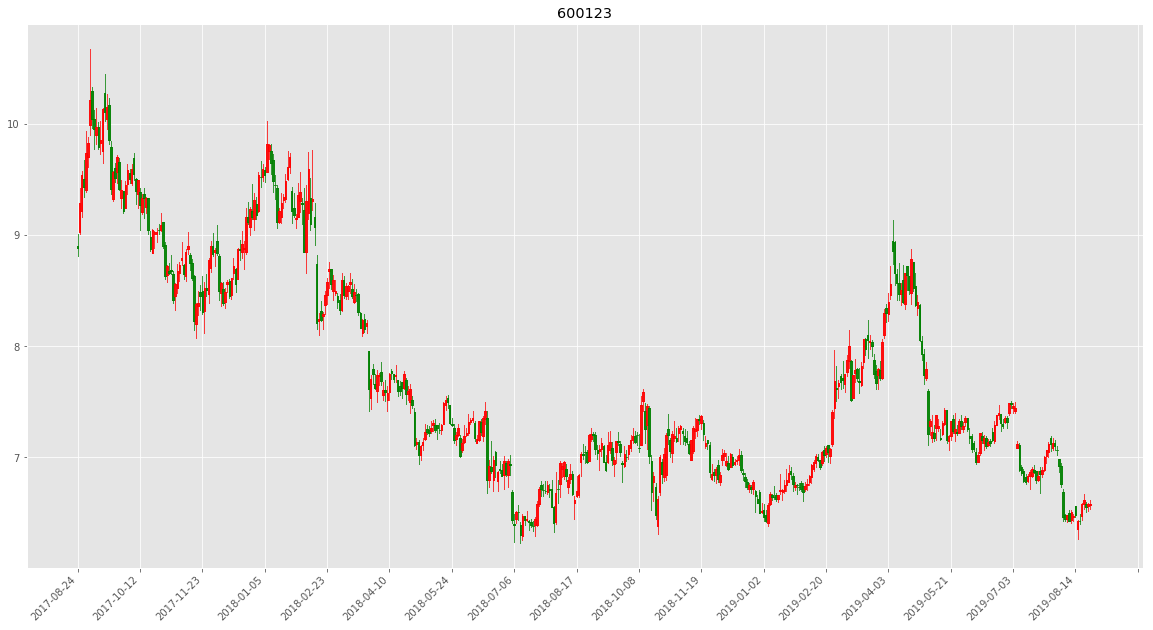

In [4]:
def mydate_formatter(x,pos):
    try:
        return df_idx[int(x)]
    except IndexError:
        return ''

begin_time = (datetime.date.today() - relativedelta(months=24)).strftime("%Y-%m-%d")
end_time = datetime.date.today().strftime("%Y-%m-%d")
code = "600123"
df = ts.get_hist_data(code, start=begin_time, end=end_time)
df = df.sort_index(0)
df_idx = df.index.values

fig, ax = plt.subplots(figsize=(20, 10)) 
candlestick2_ohlc(ax = ax, 
                 opens=df["open"].values, closes=df["close"].values,
                 highs=df["high"].values, lows=df["low"].values, 
                 width=0.75, colorup='r', colordown='g', alpha=0.75)

ax.xaxis.set_major_locator(ticker.MaxNLocator(20))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate_formatter))

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
ax.grid(True)
plt.title(code)
plt.show()

In [5]:
df['date'] = df.index
# Prophet requires columns ds (Date) and y (value)
df = df.rename(columns={'date': 'ds', 'close': 'y'})

# Make the prophet model and fit on the data
prophet = fbprophet.Prophet(changepoint_prior_scale=5)
prophet.fit(df)

In [0]:
# Make a future dataframe for 2 years
forecast = prophet.make_future_dataframe(periods=10, freq='D')
# Make predictions
forecast = prophet.predict(forecast)

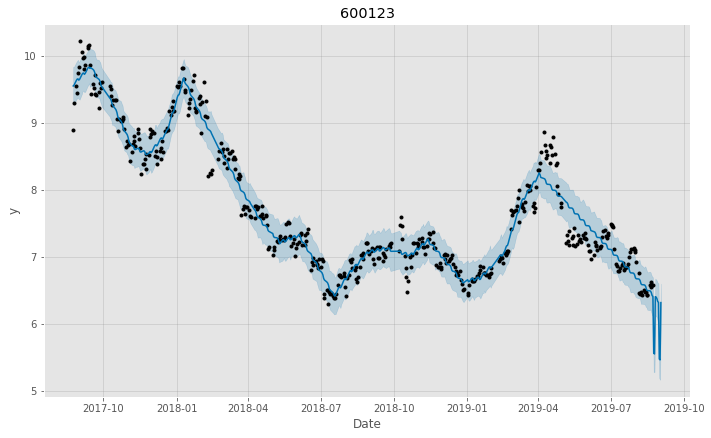

In [7]:
prophet.plot(forecast, xlabel = 'Date')
plt.title(code);

In [8]:
pro = ts.pro_api()

df = pro.fund_basic(market='E')

请设置tushare pro的token凭证码，如果没有请访问https://tushare.pro注册申请


Exception: ignored